In [1]:
import meb
from meb import utils
from meb import datasets
from meb import core
from meb import models

from functools import partial
from typing import List, Tuple

import numpy as np
import pandas as pd
from numba import jit, njit
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import timm
from tqdm import tqdm



pd.set_option("display.max_columns", 50)
%load_ext autoreload
%autoreload 2

In [3]:
c = datasets.MEGC(optical_flow=True, resize=64)
df = c.data_frame
data = c.data

In [12]:
class Config(core.Config):
    action_units = False
    device = torch.device("cuda:1")
    scheduler = None
    num_workers = 0
    criterion = nn.CrossEntropyLoss
    evaluation_fn = [
        partial(utils.MultiClassF1Score, average="macro"),
        partial(utils.MultiClassF1Score, average="micro"),
        partial(utils.MultiClassF1Score, average="weighted"),
    ]
    epochs = 200
    optimizer = partial(optim.Adam, lr=1e-4, weight_decay=1e-3)
    model = partial(models.SSSNet, output_size=3, softmax=True)

In [7]:
out = core.MEGCValidation(Config).validate(df, data)

100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.53it/s]


MultiClassF1Score
Subject: s1, n=6 | train_mean: 0.9692 | test_mean: 0.1905
MultiClassF1Score
Subject: s1, n=6 | train_mean: 0.9748 | test_mean: 0.3333
MultiClassF1Score
Subject: s1, n=6 | train_mean: 0.9749 | test_mean: 0.2857


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.08it/s]


MultiClassF1Score
Subject: s11, n=7 | train_mean: 0.9725 | test_mean: 0.8222
MultiClassF1Score
Subject: s11, n=7 | train_mean: 0.9793 | test_mean: 0.8571
MultiClassF1Score
Subject: s11, n=7 | train_mean: 0.9794 | test_mean: 0.8667


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.94it/s]


MultiClassF1Score
Subject: s12, n=9 | train_mean: 0.9623 | test_mean: 0.619
MultiClassF1Score
Subject: s12, n=9 | train_mean: 0.97 | test_mean: 0.7778
MultiClassF1Score
Subject: s12, n=9 | train_mean: 0.9703 | test_mean: 0.873


100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.57it/s]


MultiClassF1Score
Subject: s13, n=10 | train_mean: 0.9575 | test_mean: 0.4444
MultiClassF1Score
Subject: s13, n=10 | train_mean: 0.9676 | test_mean: 0.8
MultiClassF1Score
Subject: s13, n=10 | train_mean: 0.9679 | test_mean: 0.8889


100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.52it/s]


MultiClassF1Score
Subject: s14, n=10 | train_mean: 0.9601 | test_mean: 1.0
MultiClassF1Score
Subject: s14, n=10 | train_mean: 0.9699 | test_mean: 1.0
MultiClassF1Score
Subject: s14, n=10 | train_mean: 0.97 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.82it/s]


MultiClassF1Score
Subject: s15, n=4 | train_mean: 0.9611 | test_mean: 0.5556
MultiClassF1Score
Subject: s15, n=4 | train_mean: 0.968 | test_mean: 0.75
MultiClassF1Score
Subject: s15, n=4 | train_mean: 0.9683 | test_mean: 0.6667


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.92it/s]


MultiClassF1Score
Subject: s18, n=7 | train_mean: 0.9627 | test_mean: 1.0
MultiClassF1Score
Subject: s18, n=7 | train_mean: 0.9724 | test_mean: 1.0
MultiClassF1Score
Subject: s18, n=7 | train_mean: 0.9723 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.57it/s]


MultiClassF1Score
Subject: s19, n=2 | train_mean: 0.956 | test_mean: 1.0
MultiClassF1Score
Subject: s19, n=2 | train_mean: 0.9659 | test_mean: 1.0
MultiClassF1Score
Subject: s19, n=2 | train_mean: 0.966 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.59it/s]


MultiClassF1Score
Subject: s2, n=6 | train_mean: 0.9537 | test_mean: 0.6296
MultiClassF1Score
Subject: s2, n=6 | train_mean: 0.9656 | test_mean: 0.8333
MultiClassF1Score
Subject: s2, n=6 | train_mean: 0.9657 | test_mean: 0.9074


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.84it/s]


MultiClassF1Score
Subject: s20, n=22 | train_mean: 0.9673 | test_mean: 0.61
MultiClassF1Score
Subject: s20, n=22 | train_mean: 0.9738 | test_mean: 0.6818
MultiClassF1Score
Subject: s20, n=22 | train_mean: 0.9739 | test_mean: 0.6808


100%|█████████████████████████████████████████| 200/200 [00:23<00:00,  8.53it/s]


MultiClassF1Score
Subject: s3, n=39 | train_mean: 0.9617 | test_mean: 0.6173
MultiClassF1Score
Subject: s3, n=39 | train_mean: 0.9702 | test_mean: 0.6154
MultiClassF1Score
Subject: s3, n=39 | train_mean: 0.9703 | test_mean: 0.6131


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.86it/s]


MultiClassF1Score
Subject: s4, n=19 | train_mean: 0.9708 | test_mean: 0.5316
MultiClassF1Score
Subject: s4, n=19 | train_mean: 0.9764 | test_mean: 0.5263
MultiClassF1Score
Subject: s4, n=19 | train_mean: 0.9764 | test_mean: 0.5285


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.25it/s]


MultiClassF1Score
Subject: s5, n=2 | train_mean: 0.9606 | test_mean: 0.3333
MultiClassF1Score
Subject: s5, n=2 | train_mean: 0.9682 | test_mean: 0.5
MultiClassF1Score
Subject: s5, n=2 | train_mean: 0.9684 | test_mean: 0.3333


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.19it/s]


MultiClassF1Score
Subject: s6, n=4 | train_mean: 0.9637 | test_mean: 0.3889
MultiClassF1Score
Subject: s6, n=4 | train_mean: 0.9703 | test_mean: 0.5
MultiClassF1Score
Subject: s6, n=4 | train_mean: 0.9704 | test_mean: 0.5833


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.05it/s]


MultiClassF1Score
Subject: s8, n=13 | train_mean: 0.9674 | test_mean: 0.6905
MultiClassF1Score
Subject: s8, n=13 | train_mean: 0.9744 | test_mean: 0.6923
MultiClassF1Score
Subject: s8, n=13 | train_mean: 0.9746 | test_mean: 0.6996


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.10it/s]


MultiClassF1Score
Subject: s9, n=4 | train_mean: 0.9587 | test_mean: 0.7333
MultiClassF1Score
Subject: s9, n=4 | train_mean: 0.968 | test_mean: 0.75
MultiClassF1Score
Subject: s9, n=4 | train_mean: 0.9684 | test_mean: 0.7667


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.14it/s]


MultiClassF1Score
Subject: 01, n=3 | train_mean: 0.961 | test_mean: 1.0
MultiClassF1Score
Subject: 01, n=3 | train_mean: 0.9681 | test_mean: 1.0
MultiClassF1Score
Subject: 01, n=3 | train_mean: 0.9683 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.99it/s]


MultiClassF1Score
Subject: 02, n=9 | train_mean: 0.9764 | test_mean: 0.582
MultiClassF1Score
Subject: 02, n=9 | train_mean: 0.9815 | test_mean: 0.7778
MultiClassF1Score
Subject: 02, n=9 | train_mean: 0.9816 | test_mean: 0.7795


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.99it/s]


MultiClassF1Score
Subject: 03, n=5 | train_mean: 0.9559 | test_mean: 1.0
MultiClassF1Score
Subject: 03, n=5 | train_mean: 0.9657 | test_mean: 1.0
MultiClassF1Score
Subject: 03, n=5 | train_mean: 0.966 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.98it/s]


MultiClassF1Score
Subject: 04, n=2 | train_mean: 0.9773 | test_mean: 1.0
MultiClassF1Score
Subject: 04, n=2 | train_mean: 0.9818 | test_mean: 1.0
MultiClassF1Score
Subject: 04, n=2 | train_mean: 0.9819 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.92it/s]


MultiClassF1Score
Subject: 05, n=6 | train_mean: 0.9608 | test_mean: 0.5556
MultiClassF1Score
Subject: 05, n=6 | train_mean: 0.9702 | test_mean: 0.8333
MultiClassF1Score
Subject: 05, n=6 | train_mean: 0.9704 | test_mean: 0.7778


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.90it/s]


MultiClassF1Score
Subject: 06, n=4 | train_mean: 0.9682 | test_mean: 0.5556
MultiClassF1Score
Subject: 06, n=4 | train_mean: 0.9749 | test_mean: 0.75
MultiClassF1Score
Subject: 06, n=4 | train_mean: 0.9751 | test_mean: 0.6667


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.83it/s]


MultiClassF1Score
Subject: 07, n=5 | train_mean: 0.9563 | test_mean: 1.0
MultiClassF1Score
Subject: 07, n=5 | train_mean: 0.9657 | test_mean: 1.0
MultiClassF1Score
Subject: 07, n=5 | train_mean: 0.9658 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.83it/s]


MultiClassF1Score
Subject: 08, n=1 | train_mean: 0.9524 | test_mean: 0.0
MultiClassF1Score
Subject: 08, n=1 | train_mean: 0.9615 | test_mean: 0.0
MultiClassF1Score
Subject: 08, n=1 | train_mean: 0.9618 | test_mean: 0.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.95it/s]


MultiClassF1Score
Subject: 09, n=10 | train_mean: 0.9554 | test_mean: 1.0
MultiClassF1Score
Subject: 09, n=10 | train_mean: 0.9653 | test_mean: 1.0
MultiClassF1Score
Subject: 09, n=10 | train_mean: 0.9656 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.04it/s]


MultiClassF1Score
Subject: 11, n=4 | train_mean: 0.969 | test_mean: 1.0
MultiClassF1Score
Subject: 11, n=4 | train_mean: 0.9749 | test_mean: 1.0
MultiClassF1Score
Subject: 11, n=4 | train_mean: 0.975 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.97it/s]


MultiClassF1Score
Subject: 12, n=11 | train_mean: 0.9582 | test_mean: 0.8963
MultiClassF1Score
Subject: 12, n=11 | train_mean: 0.9675 | test_mean: 0.9091
MultiClassF1Score
Subject: 12, n=11 | train_mean: 0.9679 | test_mean: 0.9131


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.04it/s]


MultiClassF1Score
Subject: 13, n=2 | train_mean: 0.9537 | test_mean: 1.0
MultiClassF1Score
Subject: 13, n=2 | train_mean: 0.9636 | test_mean: 1.0
MultiClassF1Score
Subject: 13, n=2 | train_mean: 0.9638 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.88it/s]


MultiClassF1Score
Subject: 14, n=3 | train_mean: 0.9545 | test_mean: 0.4
MultiClassF1Score
Subject: 14, n=3 | train_mean: 0.9636 | test_mean: 0.6667
MultiClassF1Score
Subject: 14, n=3 | train_mean: 0.9637 | test_mean: 0.8


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.00it/s]


MultiClassF1Score
Subject: 15, n=3 | train_mean: 0.9576 | test_mean: 0.5556
MultiClassF1Score
Subject: 15, n=3 | train_mean: 0.9681 | test_mean: 0.6667
MultiClassF1Score
Subject: 15, n=3 | train_mean: 0.9681 | test_mean: 0.5556


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.94it/s]


MultiClassF1Score
Subject: 16, n=3 | train_mean: 0.9595 | test_mean: 0.6667
MultiClassF1Score
Subject: 16, n=3 | train_mean: 0.9681 | test_mean: 0.6667
MultiClassF1Score
Subject: 16, n=3 | train_mean: 0.9685 | test_mean: 0.6667


100%|█████████████████████████████████████████| 200/200 [00:23<00:00,  8.58it/s]


MultiClassF1Score
Subject: 17, n=31 | train_mean: 0.9567 | test_mean: 0.8262
MultiClassF1Score
Subject: 17, n=31 | train_mean: 0.9659 | test_mean: 0.9355
MultiClassF1Score
Subject: 17, n=31 | train_mean: 0.9663 | test_mean: 0.9358


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.89it/s]


MultiClassF1Score
Subject: 19, n=11 | train_mean: 0.9579 | test_mean: 0.9153
MultiClassF1Score
Subject: 19, n=11 | train_mean: 0.9675 | test_mean: 0.9091
MultiClassF1Score
Subject: 19, n=11 | train_mean: 0.9675 | test_mean: 0.9105


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.91it/s]


MultiClassF1Score
Subject: 20, n=2 | train_mean: 0.9673 | test_mean: 1.0
MultiClassF1Score
Subject: 20, n=2 | train_mean: 0.975 | test_mean: 1.0
MultiClassF1Score
Subject: 20, n=2 | train_mean: 0.9751 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.92it/s]


MultiClassF1Score
Subject: 21, n=1 | train_mean: 0.9717 | test_mean: 0.0
MultiClassF1Score
Subject: 21, n=1 | train_mean: 0.9773 | test_mean: 0.0
MultiClassF1Score
Subject: 21, n=1 | train_mean: 0.9774 | test_mean: 0.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.73it/s]


MultiClassF1Score
Subject: 22, n=2 | train_mean: 0.965 | test_mean: 1.0
MultiClassF1Score
Subject: 22, n=2 | train_mean: 0.9727 | test_mean: 1.0
MultiClassF1Score
Subject: 22, n=2 | train_mean: 0.9726 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.75it/s]


MultiClassF1Score
Subject: 23, n=8 | train_mean: 0.9496 | test_mean: 0.4667
MultiClassF1Score
Subject: 23, n=8 | train_mean: 0.9608 | test_mean: 0.875
MultiClassF1Score
Subject: 23, n=8 | train_mean: 0.9612 | test_mean: 0.8167


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.75it/s]


MultiClassF1Score
Subject: 24, n=3 | train_mean: 0.9682 | test_mean: 0.5556
MultiClassF1Score
Subject: 24, n=3 | train_mean: 0.9749 | test_mean: 0.6667
MultiClassF1Score
Subject: 24, n=3 | train_mean: 0.975 | test_mean: 0.7778


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.86it/s]


MultiClassF1Score
Subject: 25, n=5 | train_mean: 0.9698 | test_mean: 0.7619
MultiClassF1Score
Subject: 25, n=5 | train_mean: 0.9748 | test_mean: 0.8
MultiClassF1Score
Subject: 25, n=5 | train_mean: 0.9749 | test_mean: 0.781


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.04it/s]


MultiClassF1Score
Subject: 26, n=11 | train_mean: 0.9582 | test_mean: 0.45
MultiClassF1Score
Subject: 26, n=11 | train_mean: 0.9675 | test_mean: 0.8182
MultiClassF1Score
Subject: 26, n=11 | train_mean: 0.9678 | test_mean: 0.7364


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.10it/s]


MultiClassF1Score
Subject: 006, n=11 | train_mean: 0.9534 | test_mean: 0.5185
MultiClassF1Score
Subject: 006, n=11 | train_mean: 0.9629 | test_mean: 0.8182
MultiClassF1Score
Subject: 006, n=11 | train_mean: 0.9629 | test_mean: 0.8485


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.18it/s]


MultiClassF1Score
Subject: 007, n=8 | train_mean: 0.9613 | test_mean: 0.5222
MultiClassF1Score
Subject: 007, n=8 | train_mean: 0.97 | test_mean: 0.5
MultiClassF1Score
Subject: 007, n=8 | train_mean: 0.97 | test_mean: 0.5292


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.25it/s]


MultiClassF1Score
Subject: 009, n=4 | train_mean: 0.9695 | test_mean: 0.4286
MultiClassF1Score
Subject: 009, n=4 | train_mean: 0.9772 | test_mean: 0.75
MultiClassF1Score
Subject: 009, n=4 | train_mean: 0.9772 | test_mean: 0.6429


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.16it/s]


MultiClassF1Score
Subject: 010, n=4 | train_mean: 0.9594 | test_mean: 1.0
MultiClassF1Score
Subject: 010, n=4 | train_mean: 0.968 | test_mean: 1.0
MultiClassF1Score
Subject: 010, n=4 | train_mean: 0.9683 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.03it/s]


MultiClassF1Score
Subject: 011, n=20 | train_mean: 0.9557 | test_mean: 0.4437
MultiClassF1Score
Subject: 011, n=20 | train_mean: 0.9645 | test_mean: 0.7
MultiClassF1Score
Subject: 011, n=20 | train_mean: 0.9645 | test_mean: 0.7016


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.89it/s]


MultiClassF1Score
Subject: 012, n=3 | train_mean: 0.9571 | test_mean: 0.0
MultiClassF1Score
Subject: 012, n=3 | train_mean: 0.9658 | test_mean: 0.0
MultiClassF1Score
Subject: 012, n=3 | train_mean: 0.9661 | test_mean: 0.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.84it/s]


MultiClassF1Score
Subject: 013, n=6 | train_mean: 0.9629 | test_mean: 0.4545
MultiClassF1Score
Subject: 013, n=6 | train_mean: 0.9702 | test_mean: 0.8333
MultiClassF1Score
Subject: 013, n=6 | train_mean: 0.9705 | test_mean: 0.9091


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.11it/s]


MultiClassF1Score
Subject: 014, n=10 | train_mean: 0.9684 | test_mean: 0.55
MultiClassF1Score
Subject: 014, n=10 | train_mean: 0.9745 | test_mean: 0.4
MultiClassF1Score
Subject: 014, n=10 | train_mean: 0.9747 | test_mean: 0.43


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.06it/s]


MultiClassF1Score
Subject: 015, n=3 | train_mean: 0.9706 | test_mean: 0.2222
MultiClassF1Score
Subject: 015, n=3 | train_mean: 0.9772 | test_mean: 0.3333
MultiClassF1Score
Subject: 015, n=3 | train_mean: 0.9773 | test_mean: 0.2222


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.95it/s]


MultiClassF1Score
Subject: 016, n=5 | train_mean: 0.9528 | test_mean: 0.5556
MultiClassF1Score
Subject: 016, n=5 | train_mean: 0.9634 | test_mean: 0.6
MultiClassF1Score
Subject: 016, n=5 | train_mean: 0.9636 | test_mean: 0.4667


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.93it/s]


MultiClassF1Score
Subject: 017, n=4 | train_mean: 0.966 | test_mean: 0.6
MultiClassF1Score
Subject: 017, n=4 | train_mean: 0.9726 | test_mean: 0.75
MultiClassF1Score
Subject: 017, n=4 | train_mean: 0.9727 | test_mean: 0.85


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.01it/s]


MultiClassF1Score
Subject: 018, n=3 | train_mean: 0.9563 | test_mean: 0.4
MultiClassF1Score
Subject: 018, n=3 | train_mean: 0.9658 | test_mean: 0.6667
MultiClassF1Score
Subject: 018, n=3 | train_mean: 0.966 | test_mean: 0.5333


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.89it/s]


MultiClassF1Score
Subject: 019, n=1 | train_mean: 0.9637 | test_mean: 1.0
MultiClassF1Score
Subject: 019, n=1 | train_mean: 0.9705 | test_mean: 1.0
MultiClassF1Score
Subject: 019, n=1 | train_mean: 0.9707 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.10it/s]


MultiClassF1Score
Subject: 020, n=4 | train_mean: 0.9563 | test_mean: 0.4444
MultiClassF1Score
Subject: 020, n=4 | train_mean: 0.9658 | test_mean: 0.5
MultiClassF1Score
Subject: 020, n=4 | train_mean: 0.9661 | test_mean: 0.6667


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.11it/s]


MultiClassF1Score
Subject: 021, n=2 | train_mean: 0.9594 | test_mean: 1.0
MultiClassF1Score
Subject: 021, n=2 | train_mean: 0.9682 | test_mean: 1.0
MultiClassF1Score
Subject: 021, n=2 | train_mean: 0.9684 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.99it/s]


MultiClassF1Score
Subject: 022, n=5 | train_mean: 0.9615 | test_mean: 1.0
MultiClassF1Score
Subject: 022, n=5 | train_mean: 0.9703 | test_mean: 1.0
MultiClassF1Score
Subject: 022, n=5 | train_mean: 0.9705 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.06it/s]


MultiClassF1Score
Subject: 023, n=1 | train_mean: 0.9569 | test_mean: 1.0
MultiClassF1Score
Subject: 023, n=1 | train_mean: 0.966 | test_mean: 1.0
MultiClassF1Score
Subject: 023, n=1 | train_mean: 0.9663 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.11it/s]


MultiClassF1Score
Subject: 024, n=1 | train_mean: 0.9614 | test_mean: 1.0
MultiClassF1Score
Subject: 024, n=1 | train_mean: 0.9705 | test_mean: 1.0
MultiClassF1Score
Subject: 024, n=1 | train_mean: 0.9706 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.05it/s]


MultiClassF1Score
Subject: 026, n=9 | train_mean: 0.9564 | test_mean: 0.4375
MultiClassF1Score
Subject: 026, n=9 | train_mean: 0.9654 | test_mean: 0.7778
MultiClassF1Score
Subject: 026, n=9 | train_mean: 0.9655 | test_mean: 0.875


100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.89it/s]


MultiClassF1Score
Subject: 028, n=3 | train_mean: 0.9563 | test_mean: 1.0
MultiClassF1Score
Subject: 028, n=3 | train_mean: 0.9658 | test_mean: 1.0
MultiClassF1Score
Subject: 028, n=3 | train_mean: 0.9662 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.06it/s]


MultiClassF1Score
Subject: 030, n=3 | train_mean: 0.973 | test_mean: 1.0
MultiClassF1Score
Subject: 030, n=3 | train_mean: 0.9795 | test_mean: 1.0
MultiClassF1Score
Subject: 030, n=3 | train_mean: 0.9796 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.04it/s]


MultiClassF1Score
Subject: 031, n=1 | train_mean: 0.9603 | test_mean: 1.0
MultiClassF1Score
Subject: 031, n=1 | train_mean: 0.9683 | test_mean: 1.0
MultiClassF1Score
Subject: 031, n=1 | train_mean: 0.9685 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.25it/s]


MultiClassF1Score
Subject: 032, n=4 | train_mean: 0.9695 | test_mean: 0.4286
MultiClassF1Score
Subject: 032, n=4 | train_mean: 0.9772 | test_mean: 0.75
MultiClassF1Score
Subject: 032, n=4 | train_mean: 0.9773 | test_mean: 0.8571


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.26it/s]


MultiClassF1Score
Subject: 033, n=5 | train_mean: 0.9637 | test_mean: 0.3333
MultiClassF1Score
Subject: 033, n=5 | train_mean: 0.9703 | test_mean: 0.8
MultiClassF1Score
Subject: 033, n=5 | train_mean: 0.9705 | test_mean: 0.8


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.10it/s]


MultiClassF1Score
Subject: 034, n=3 | train_mean: 0.9575 | test_mean: 1.0
MultiClassF1Score
Subject: 034, n=3 | train_mean: 0.9658 | test_mean: 1.0
MultiClassF1Score
Subject: 034, n=3 | train_mean: 0.9658 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.10it/s]


MultiClassF1Score
Subject: 035, n=8 | train_mean: 0.9709 | test_mean: 0.6111
MultiClassF1Score
Subject: 035, n=8 | train_mean: 0.977 | test_mean: 0.75
MultiClassF1Score
Subject: 035, n=8 | train_mean: 0.9771 | test_mean: 0.8542


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.09it/s]


MultiClassF1Score
Subject: 036, n=1 | train_mean: 0.9569 | test_mean: 1.0
MultiClassF1Score
Subject: 036, n=1 | train_mean: 0.966 | test_mean: 1.0
MultiClassF1Score
Subject: 036, n=1 | train_mean: 0.9663 | test_mean: 1.0


100%|█████████████████████████████████████████| 200/200 [00:24<00:00,  8.18it/s]


MultiClassF1Score
Subject: 037, n=1 | train_mean: 0.9603 | test_mean: 0.0
MultiClassF1Score
Subject: 037, n=1 | train_mean: 0.9683 | test_mean: 0.0
MultiClassF1Score
Subject: 037, n=1 | train_mean: 0.9685 | test_mean: 0.0
Total f1: [0.7393749087191471, 0.7601809954751131, 0.7615330535265415], SMIC: [0.6991215412268043, 0.6951219512195121, 0.6921493497231624], CASME2: [0.851701737966569, 0.8758620689655172, 0.8738363903819306], SAMM: [0.6023132810229584, 0.7142857142857143, 0.7129062411914704]


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
class MValidation(core.MEGCValidation):
    def __init__(self, config: Config, verbose: bool = True):
        super().__init__(config)
        self.verbose = verbose
        self.disable_tqdm = True
    
    def validate(self, df: pd.DataFrame, input_data: np.ndarray, seed_n: int = 1):
        utils.set_random_seeds(seed_n)
        subject_names = df["subject"].unique()
        le = LabelEncoder()
        labels = le.fit_transform(df["emotion"])
        outputs_list = []
        for subject_name in subject_names:
            train_metrics, test_metrics, outputs_test = self.validate_split(df, input_data, labels, subject_name)
            outputs_list.append(outputs_test)
            if self.verbose:
                self.printer.print_train_test_evaluation(
                    train_metrics, test_metrics, subject_name, outputs_test.shape[0]
                )
                
        # Calculate F1-Score for each subject seperately and average the results
        total_f1 = []
        for i, subject_predictions in enumerate(outputs_list):
            subject_index = df[df["subject"] == subject_names[i]].index.tolist()
            subject_labels = labels[subject_index]
            f1_subject = self.evaluation_fn(subject_labels, subject_predictions)
            total_f1.append(f1_subject)
        f1_total = np.mean(total_f1)
        if self.verbose:
             print(f"Total f1: {f1_total}")
        return outputs_list

In [13]:
# Averaging over folds
class Config(Config):
    evaluation_fn = partial(utils.MultiClassF1Score, average="macro")
out = MValidation(Config).validate(df, data)

Subject: s1, n=6 | train_mean: 0.9692 | test_mean: 0.1905
Subject: s11, n=7 | train_mean: 0.9725 | test_mean: 0.8222
Subject: s12, n=9 | train_mean: 0.9623 | test_mean: 0.619
Subject: s13, n=10 | train_mean: 0.9575 | test_mean: 0.4444
Subject: s14, n=10 | train_mean: 0.9601 | test_mean: 1.0
Subject: s15, n=4 | train_mean: 0.9611 | test_mean: 0.5556
Subject: s18, n=7 | train_mean: 0.9627 | test_mean: 1.0
Subject: s19, n=2 | train_mean: 0.956 | test_mean: 1.0
Subject: s2, n=6 | train_mean: 0.9537 | test_mean: 0.6296
Subject: s20, n=22 | train_mean: 0.9673 | test_mean: 0.61
Subject: s3, n=39 | train_mean: 0.9617 | test_mean: 0.6173
Subject: s4, n=19 | train_mean: 0.9708 | test_mean: 0.5316
Subject: s5, n=2 | train_mean: 0.9606 | test_mean: 0.3333
Subject: s6, n=4 | train_mean: 0.9637 | test_mean: 0.3889
Subject: s8, n=13 | train_mean: 0.9674 | test_mean: 0.6905
Subject: s9, n=4 | train_mean: 0.9587 | test_mean: 0.7333
Subject: 01, n=3 | train_mean: 0.961 | test_mean: 1.0
Subject: 02, n=9 

In [11]:
import seaborn as sns
sns.color_palette("Set2")
sns.set_theme()

/tmp/ipykernel_21714/91130946.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, size=16)


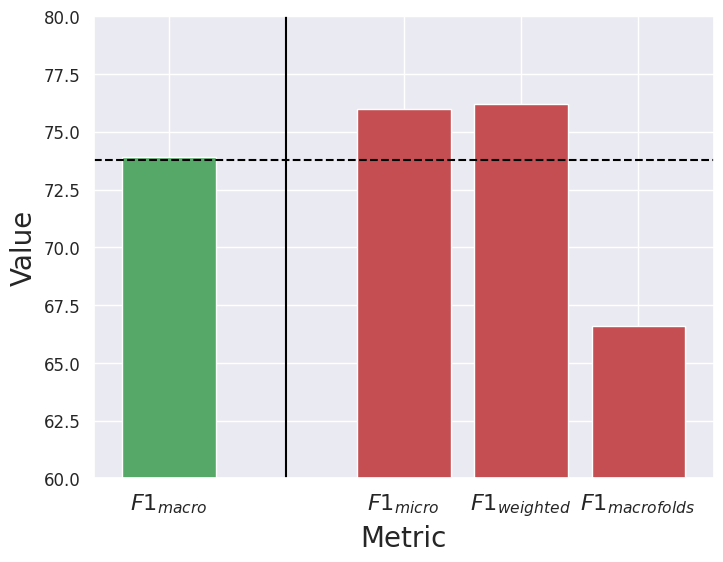

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ys = [73.9, 76.0, 76.2, 66.6]
xs = [1, 3, 4, 5]
ax.bar(xs, ys, color=["g", "r", "r", "r"])
ax.axvline(x=2, ymin=0.00, ymax=1, color="black")
ax.axhline(y=73.8, color="black", linestyle="--")
ax.set_ylim(60, 80)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "$F1_{macro}$"
labels[3] = "$F1_{micro}$"
labels[4] = "$F1_{weighted}$"
labels[5] = "$F1_{macro folds}$ "
ax.set_xticklabels(labels, size=16)
ax.set_xlabel("Metric", size=20)
ax.set_ylabel("Value", size=20)
plt.yticks(size=12)
#fig.savefig("../../Figures/f1_scores.pdf")
plt.show()
